In [75]:
import numpy as np
import matplotlib.pyplot as plt

In [181]:
def take_action(S):
    if S == 0:
        if np.random.rand() > 0.1:
            return 0
        else:
            return 1
    if S == 1:
        if np.random.rand() > 0.1:
            return 0
        else:
            return 2

In [182]:
def n_step_TD(alpha,gamma,nr_episodes,n):
    V = np.zeros(3)*3
    arr_V = []
    for k in range(nr_episodes):
        S = 0
        state_arr = [S]
        reward_arr = [None]
        t = 0
        T = 1e20
        
        while True:
            if t < T:
                S = take_action(S)
                state_arr.append(S)
                if S == 2:
                    T = t+1
                    reward_arr.append(1)
                else:
                    reward_arr.append(0)
            tau = t-n+1
            
            if tau >= 0:
                G = 0
                for i in range(tau+1,min(tau+n,T)+1):
                    G += gamma**(i-tau-1)*reward_arr[i]
                if tau+n < T:
                    G += gamma**n*V[state_arr[tau+n]]
                V[state_arr[tau]] += alpha*(G - V[state_arr[tau]])
            
            t +=1
            
            if tau == T-1:
                arr_V.append(np.array(V))
                break
    
    return arr_V

In [179]:
def n_step_TD_nochange(alpha,gamma,nr_episodes,n):
    V = np.zeros(3)
    arr_V = []
    
    for k in range(nr_episodes):
        S = 0
        state_arr = [S]
        reward_arr = [None]
        delta_arr = []
        t = 0
        T = 1e20
        
        while True:
            if t < T:
                S = take_action(S)
                state_arr.append(S)
                if S == 2:
                    T = t+1
                    reward_arr.append(1)
                else:
                    reward_arr.append(0)
            
            delta_arr.append(reward_arr[-1]+ gamma*V[state_arr[-1]]-V[state_arr[-2]])
            tau = t-n+1
            
            if tau >= 0:
                G = 0
                for i in range(tau,min(tau+n,T)):
                    G += gamma**(i-tau)*delta_arr[i]
                    
                V[state_arr[tau]] += alpha*G
            
            t +=1
            
            if tau == T-1:
                arr_V.append(np.array(V))
                break
    
    return arr_V

<IPython.core.display.Javascript object>


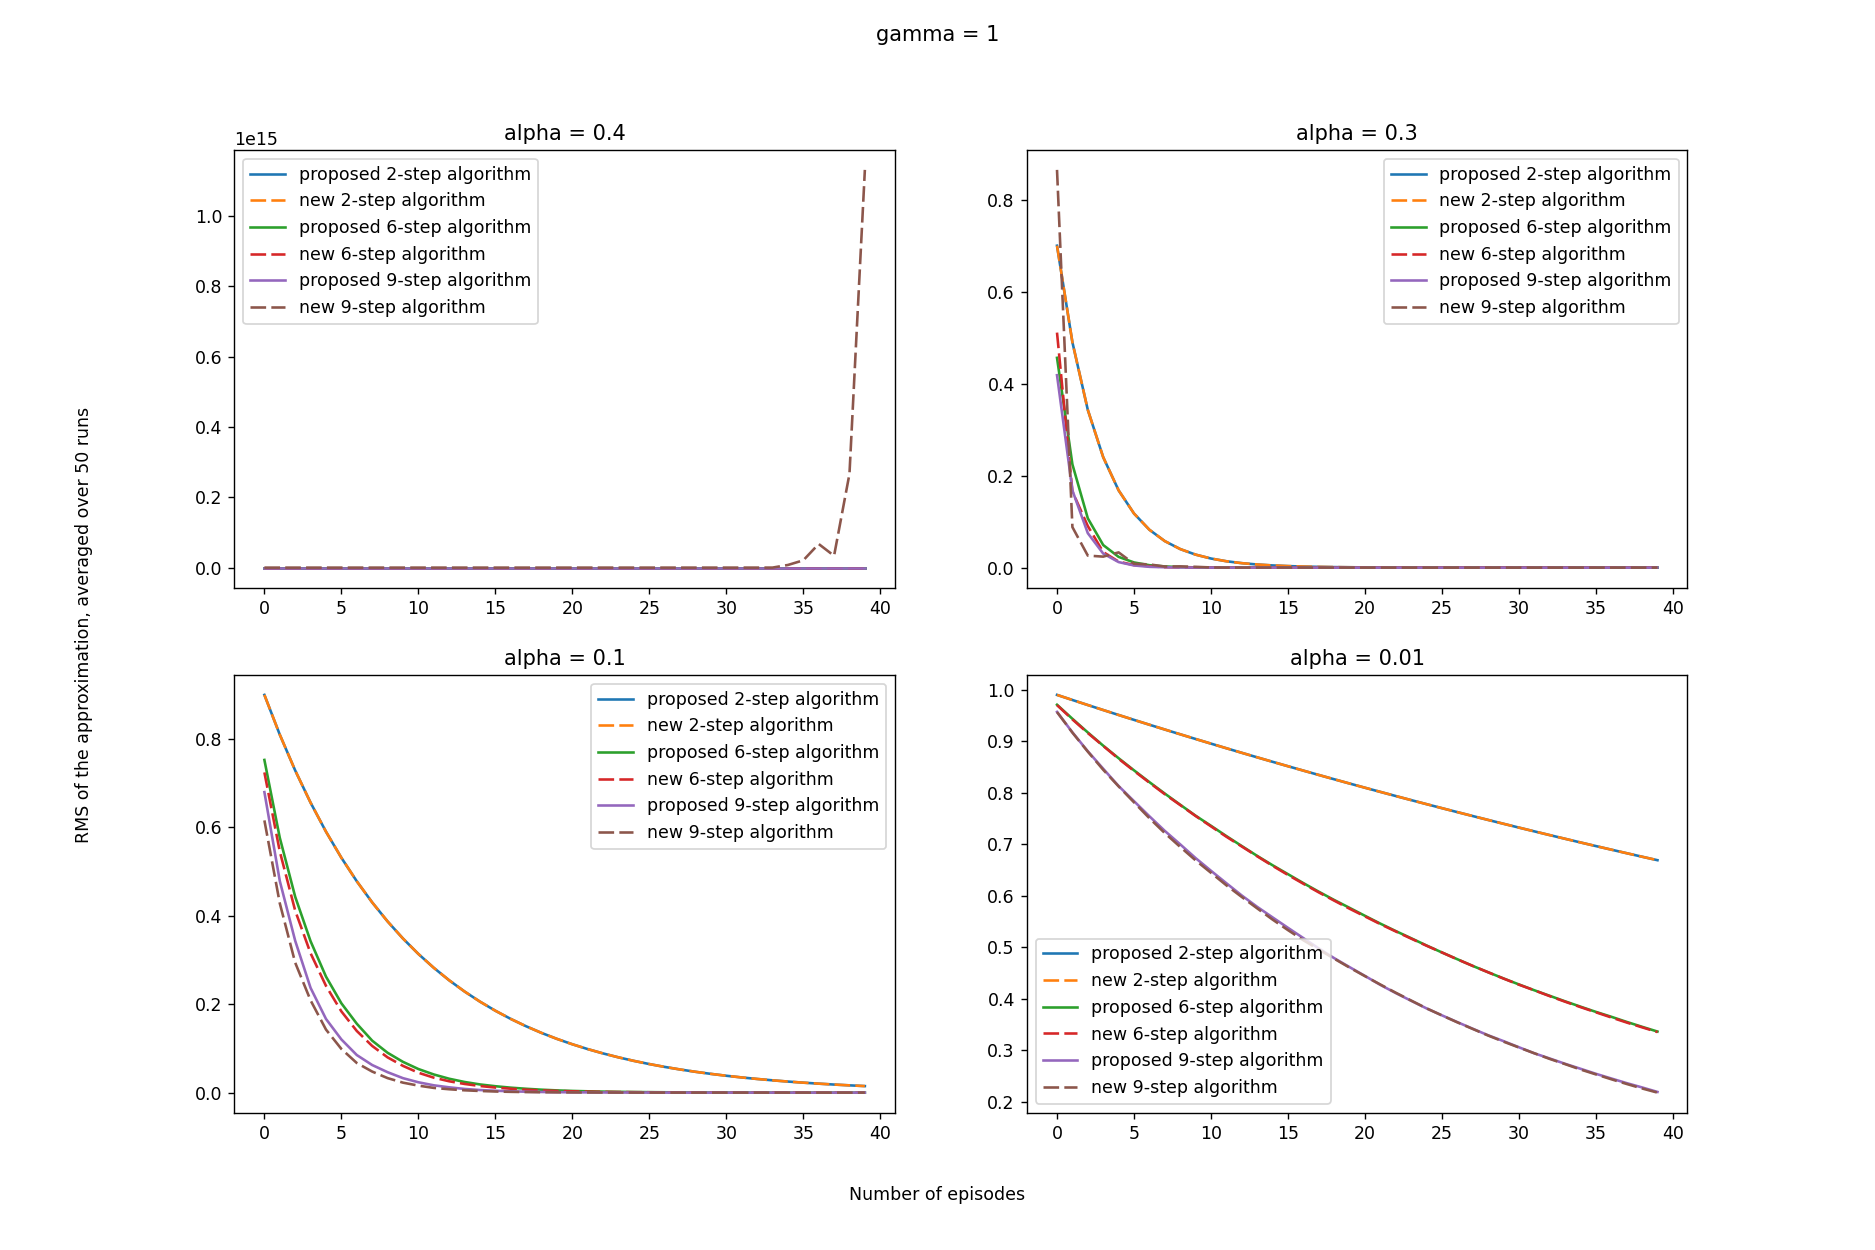

In [229]:
#%matplotlib notebook
max_episodes = 40
alpha_arr = [0.4, 0.3, 0.1,0.01]
gamma = 1
real_s_2 = 0.1/(1-0.9/(10/gamma - 9))
real_s_1 = real_s_2/(10/gamma - 9)
fig, axs = plt.subplots(2,2, figsize = ((15,10)))

for alpha in zip(alpha_arr,[(0,0),(0,1),(1,0),(1,1)]):
    for n in [2,6,9]:
        avg_1 = [np.zeros(3)]*max_episodes
        avg_2 = [np.zeros(3)]*max_episodes
        avg_err_1 = [0]*max_episodes
        avg_err_2 = [0]*max_episodes
        for k in range(50):
            avg_1 = [x+y for x,y in zip(avg_1,n_step_TD(alpha[0],gamma,max_episodes,n))]
            avg_2 = [x+y for x,y in zip(avg_2,n_step_TD_nochange(alpha[0],gamma,max_episodes,n))]
        x = [i for i in range(max_episodes)]
        for k in range(max_episodes):
            avg_err_1[k] = np.sqrt(((real_s_1-avg_1[k][0]/50)**2 + (real_s_2-avg_1[k][1]/50)**2)/2)
            avg_err_2[k] = np.sqrt(((real_s_1-avg_2[k][0]/50)**2 + (real_s_2-avg_2[k][1]/50)**2)/2)
        axs[alpha[1]].plot(x,avg_err_1, label = 'proposed {}-step algorithm'.format(n))
        axs[alpha[1]].plot(x,avg_err_2, dashes = [6,2] ,label = 'new {}-step algorithm'.format(n))
        axs[alpha[1]].set_title('alpha = {}'.format(alpha[0]))
        axs[alpha[1]].legend()
        
fig.text(0.5, 0.04, "Number of episodes", ha='center')
fig.text(0.04, 0.5, "RMS of the approximation, averaged over 50 runs", va='center', rotation='vertical')
fig.suptitle('gamma = {}'.format(gamma))
fig.show()
#fig.savefig('gamma=0,7.jpg')